# Logistic Regression
### Breast Cancer Diagnostic (Wisconsin)

In [2]:
'''Local library'''
import sys
sys.path.insert(0, '../../regression/src/')
import regression_functions_utils as rfu

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [5]:
# Importing the dataset
data_file = '../../data/bcw/bcw_diag_clean.csv'
dataset = pd.read_csv(data_file)
X = dataset.iloc[:, [1, 10]].values
y = dataset.iloc[:, 10].values

### Data Exploration

#### Class Inbalance
Frequently, dependent variables in Logistic Regression show an inbalance of positive vs negative cases. 

In the current, case the inbalance is not that extreme, 65% of cases are negative, and 35% positive

Class counts


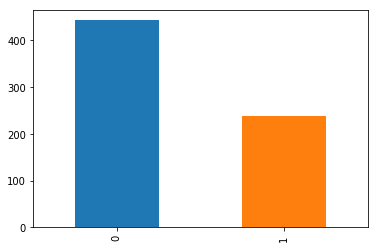

In [6]:
print('Class counts')
cc = dataset['class'].value_counts().plot('bar')

Class ratio


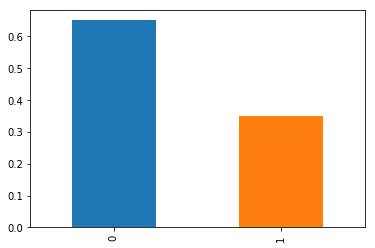

In [7]:
print('Class ratio')
cr = dataset['class'].value_counts(normalize=True).plot('bar')

#### Summarizing by class

Let's group by class, and check the average values of the independent variables

Luckly, the exploration will show a clear distinction of independent variable's values between the two classes

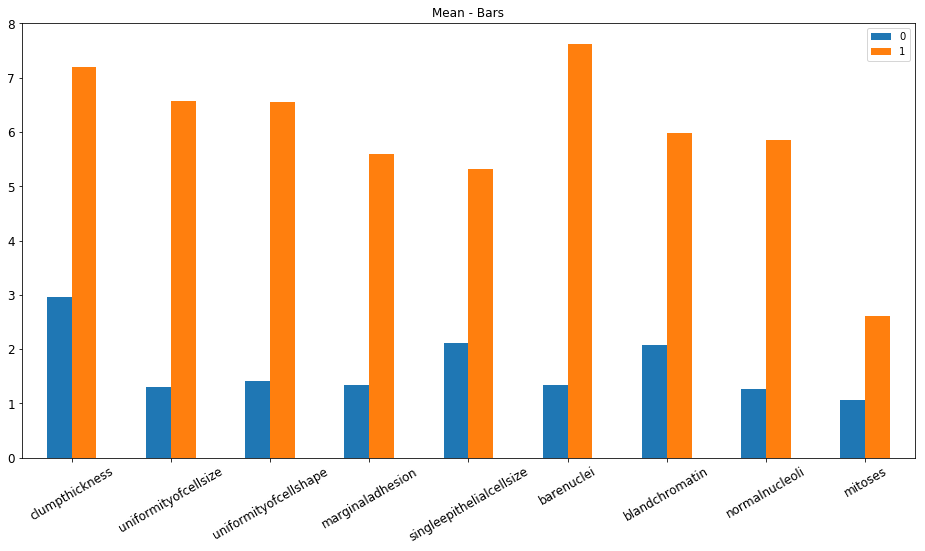

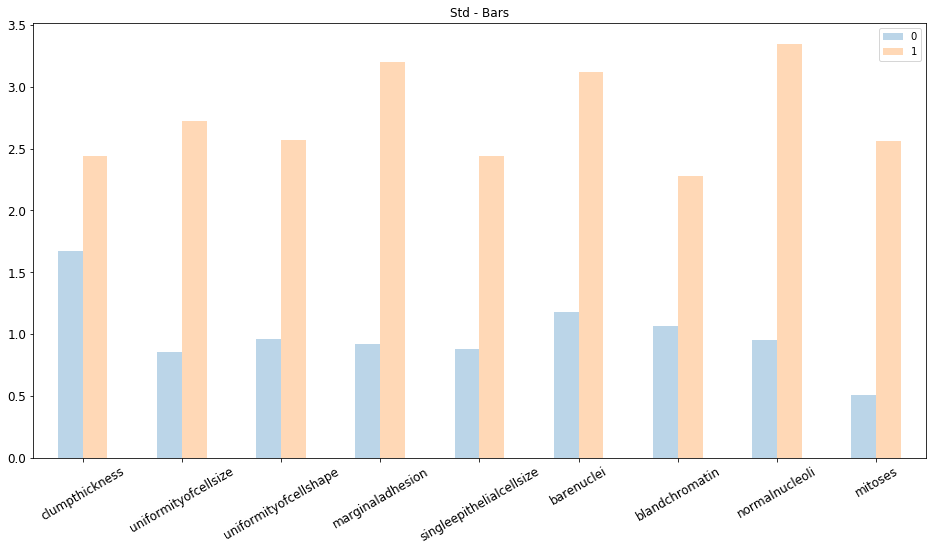

In [54]:
gbc_mean = dataset.iloc[:,1:].groupby('class').mean().reset_index()
gbc_std  = dataset.iloc[:,1:].groupby('class').std().reset_index()

gbc_mean.iloc[:,1:].transpose().plot.bar(figsize=(16,8), fontsize=12, rot=30, title='Mean - Bars')
gbc_std.iloc[:,1:].transpose().plot.bar(figsize=(16,8), fontsize=12, rot=30, title='Std - Bars', alpha=.3)

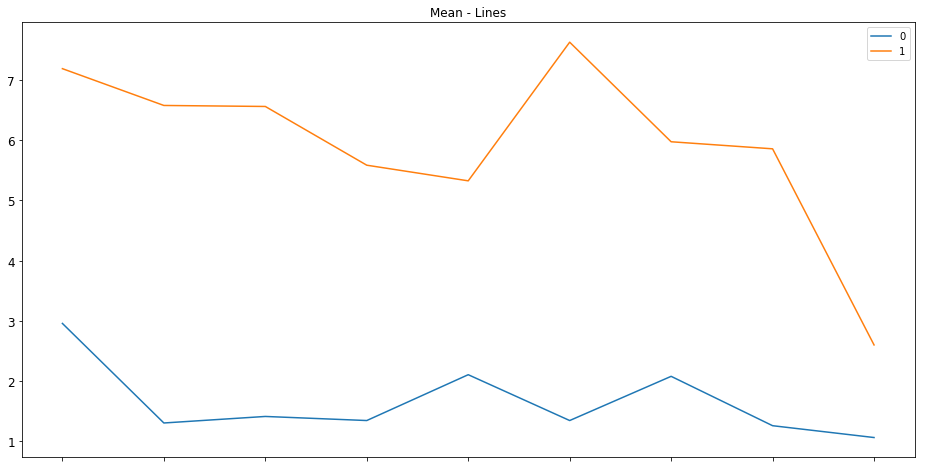

In [58]:
gbc_mean.iloc[:,1:].transpose().plot.line(figsize=(16,8), fontsize=12, rot=30, title='Mean - Lines')

In [140]:
import seaborn as snsc

Index(['samplecodenumber', 'clumpthickness', 'uniformityofcellsize',
       'uniformityofcellshape', 'marginaladhesion', 'singleepithelialcellsize',
       'barenuclei', 'blandchromatin', 'normalnucleoli', 'mitoses', 'class'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


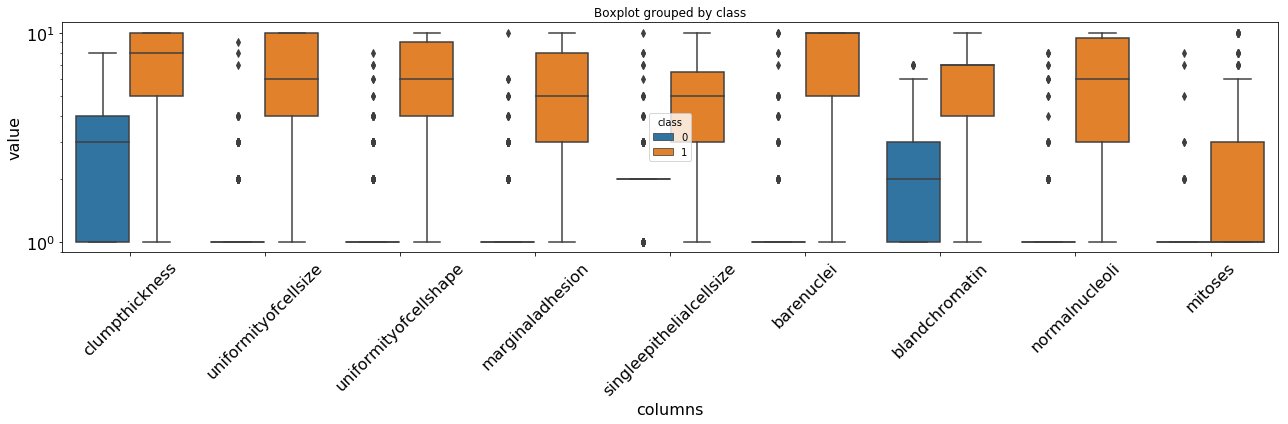

In [165]:
# https://stackoverflow.com/questions/49325050/seaborn-boxplot-and-log-axis
# https://stackoverflow.com/questions/44975337/side-by-side-boxplots-with-pandas
import seaborn as snsc

df_melt = dataset.melt(id_vars = 'class',
                          value_vars = c,
                          var_name = 'columns')

fig, ax= plt.subplots(figsize=(18, 6))
ax.set_xlabel('Measures', fontsize=16) 
ax.set_ylabel('Size', fontsize=16)
ax.set_yscale('log')
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

b = sns.boxplot(data = df_melt,
                hue = 'class', # different colors for different 'cls'
                x = 'columns',
                y = 'value',
                order = c
               )

plt.title('Boxplot grouped by class') # You can change the title here
plt.tight_layout()


### Model with full data

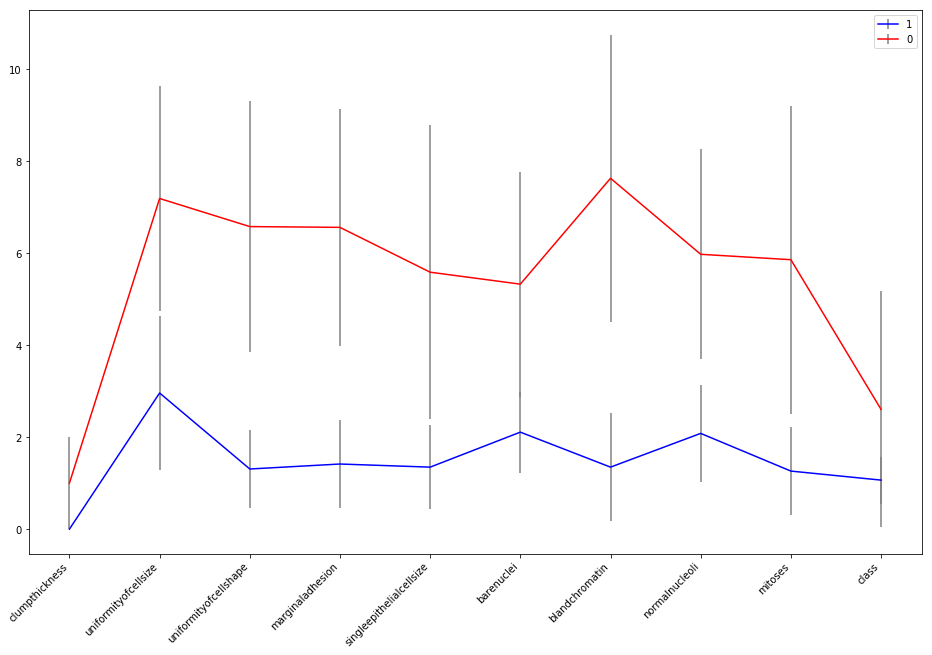

In [129]:
import matplotlib.pyplot as plt
d = dataset.iloc[:,1:]
l = d.columns
m = d.groupby('class').mean().reset_index()
s = d.groupby('class').std().reset_index()

fig = plt.figure(figsize=(16,10))
plt.errorbar(l, m.values[0], yerr=s.values[0], ecolor='gray', color='b', label='1')
plt.errorbar(l, m.values[1], yerr=s.values[1], ecolor='gray', color='r', label='0')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [18]:
X_train = X 
y_train = y

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_train)

# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_pred)

print(cm)

print('Perfect classification with whole data. Overtrained most probably')

[[443   0]
 [  0 239]]
Perfect classification with whole data. Overtrained most probably


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model with train and test sets

In [42]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
'''Model performs perfectly. Don't trust it. Need to perform some validation.'''

[[112   0]
 [  0  59]]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


"Model performs perfectly. Don't trust it. Need to perform some validation."

## Model performance validation
sklearn.linear_model.LogisticRegressionCV

It seems that it's kinf of easy for the model to correctly adjust to the data, given that
theres a clear separation between the values for positive and negative samples across independent variables.